In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pymutspec.draw import plot_mutspec192, plot_mutspec12
from pymutspec.draw.sbs_orders import ordered_sbs192_kp

## Data

In [3]:
mutspecs = pd.read_csv('../data/MutSpecVertebratescytb.csv')
mutspecs

,Species,Mut,Expected,Observed,RawMutSpec,RawMutSpecSum,MutSpec,MutBase,Context,Class
0,Abbottina_obtusirostris,T[T>G]T,0.0,0.0,0.0,1.088889,0.000000,T>G,TTT,Actinopterygii
1,Abbottina_obtusirostris,G[T>G]T,0.0,0.0,0.0,1.088889,0.000000,T>G,GTT,Actinopterygii
2,Abbottina_obtusirostris,C[T>G]T,0.0,0.0,0.0,1.088889,0.000000,T>G,CTT,Actinopterygii
3,Abbottina_obtusirostris,A[T>G]T,0.0,0.0,0.0,1.088889,0.000000,T>G,ATT,Actinopterygii
4,Abbottina_obtusirostris,T[T>C]T,8.0,0.0,0.0,1.088889,0.000000,T>C,TTT,Actinopterygii
...,...,...,...,...,...,...,...,...,...,...
185659,Zosterops_japonicus,A[A>G]A,3.0,3.0,1.0,15.981840,0.062571,A>G,AAA,Aves
185660,Zosterops_japonicus,T[A>C]A,1.0,0.0,0.0,15.981840,0.000000,A>C,TAA,Aves
185661,Zosterops_japonicus,G[A>C]A,5.0,0.0,0.0,15.981840,0.000000,A>C,GAA,Aves
185662,Zosterops_japonicus,C[A>C]A,4.0,0.0,0.0,15.981840,0.000000,A>C,CAA,Aves


In [8]:
mutspecs.Species.nunique()

967

In [12]:
cancer = pd.read_csv('../data/external/cancer_mutspec.csv')
cancer = cancer.loc[:,['Mut','MutSpec_ExDloop']].rename(columns={'MutSpec_ExDloop':'MutSpec'})
cancer

,Mut,MutSpec
0,A[A>C]A,0.000000
1,A[A>C]C,0.000783
2,A[A>C]G,0.000000
3,A[A>C]T,0.000084
4,A[A>G]A,0.008273
...,...,...
187,T[T>C]T,0.000471
188,T[T>G]A,0.000133
189,T[T>G]C,0.000000
190,T[T>G]G,0.001074


In [15]:
cancer12 = cancer.copy()
cancer12['Mut'] = cancer12['Mut'].str.slice(2, 5)
cancer12.head()

,Mut,MutSpec
0,A>C,0.000000
1,A>C,0.000783
2,A>C,0.000000
3,A>C,0.000084
4,A>G,0.008273


### Plot Mutational Spectrum for all Vertebrates

findfont: Font family ['Courier'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Courier'] not found. Falling back to DejaVu Sans.


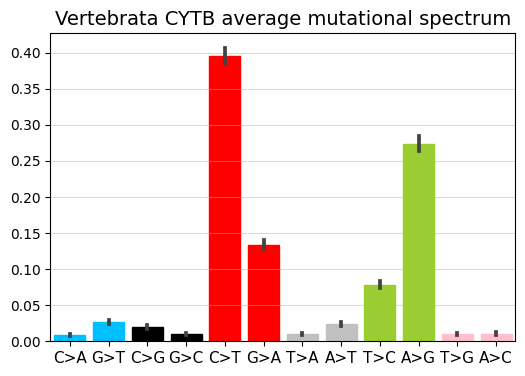

In [9]:
_species_spectra12 = mutspecs.copy()
_species_spectra12["Mut"] = _species_spectra12["Mut"].str.slice(2,5)
ax = plot_mutspec12(
    _species_spectra12.groupby(["Species", "Mut"]).MutSpec.sum().reset_index(), 
    fontname="Courier", ticksize=11, title="Vertebrata CYTB average mutational spectrum",
    savepath="../pictures/MutSpec/Mut12Vert.pdf")

findfont: Font family ['Courier'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Courier'] not found. Falling back to DejaVu Sans.


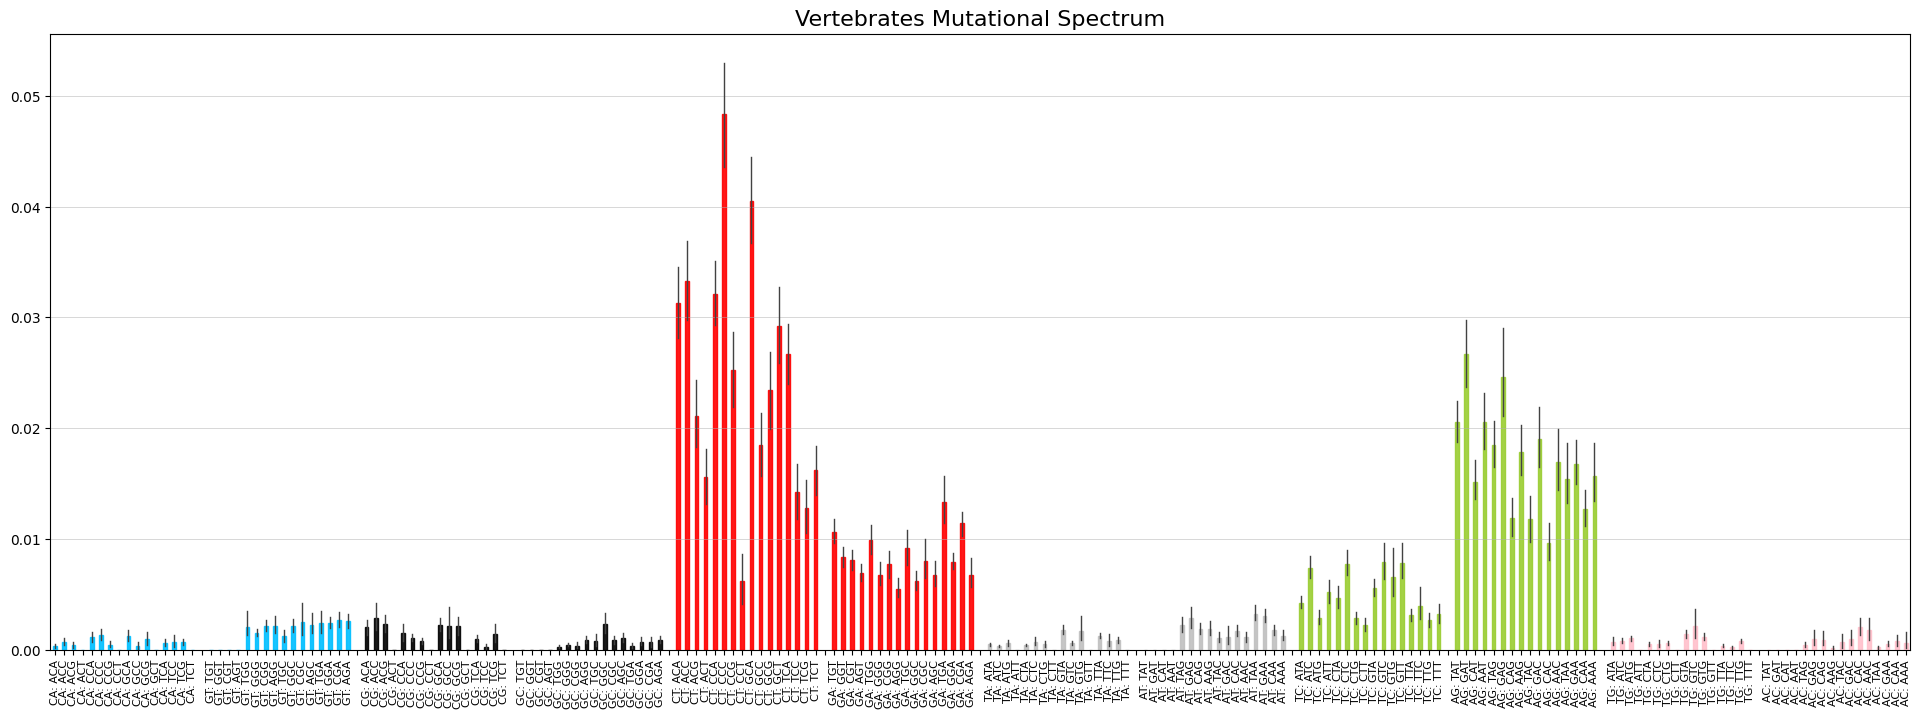

<AxesSubplot:title={'center':'Vertebrates Mutational Spectrum'}>

In [6]:
plot_mutspec192(mutspecs, title='Vertebrates Mutational Spectrum', 
                savepath='../pictures/MutSpec/MutSpec192Vert.pdf',
                fontname='Courier', ticksize=8, labels_style='long')

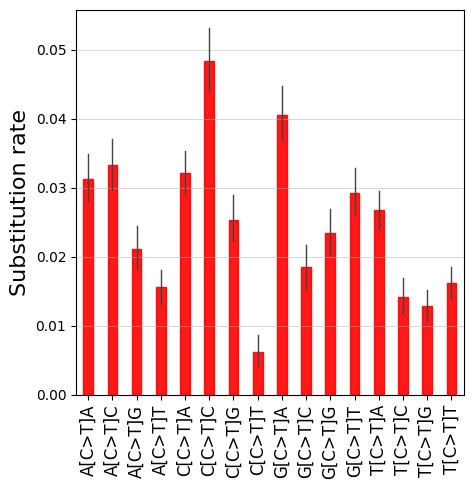

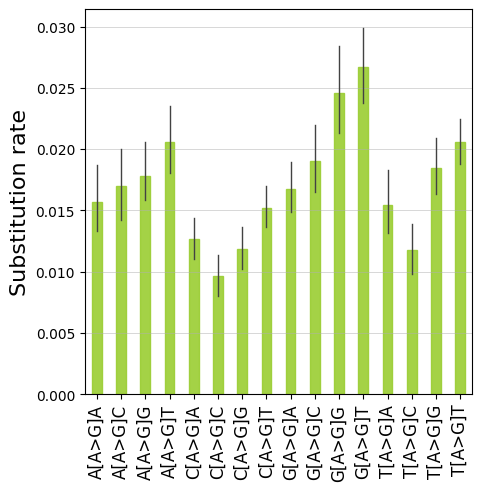

In [30]:
ax = plot_mutspec192(mutspecs, title="", ylabel="Substitution rate",  fontname="Courier", 
                ticksize=12, sbs_order=ordered_sbs192_kp[64:64+16], figsize=(5, 5))
ax.set_ylim(0., 0.07)
ax.figure.savefig("../pictures/MutSpec/vert_ChTh.pdf", bbox_inches="tight")

ax = plot_mutspec192(mutspecs, title="", ylabel="Substitution rate", fontname="Courier", 
                ticksize=12, sbs_order=sorted(ordered_sbs192_kp[16*9:16*9+16]), figsize=(5, 5))
ax.set_ylim(0., 0.032)
ax.figure.savefig("../pictures/MutSpec/vert_AhGh.pdf", bbox_inches="tight")

#### Get Cancer spectrum here

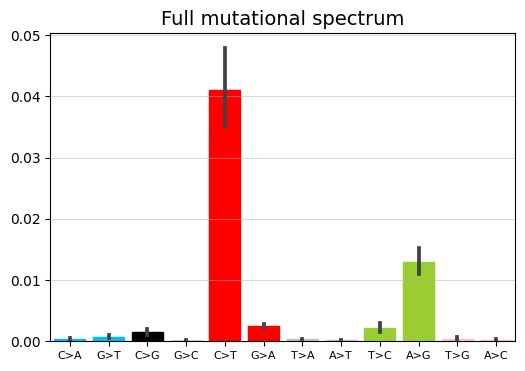

In [17]:
plot_mutspec12(cancer12);

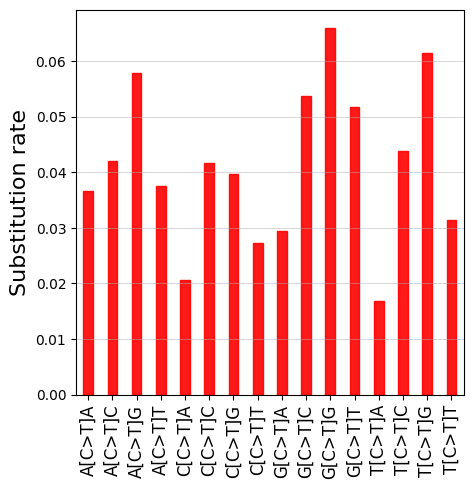

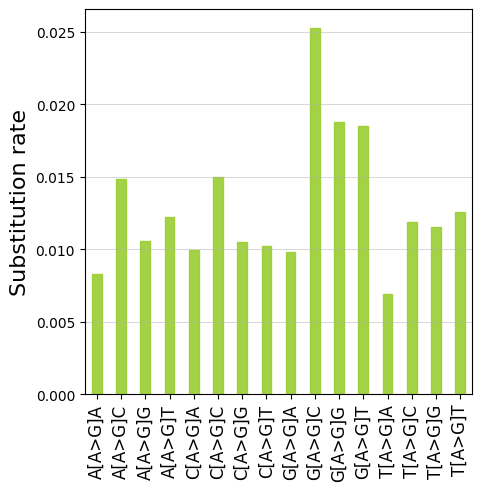

In [31]:
ax = plot_mutspec192(cancer, title="", ylabel="Substitution rate",  fontname="Courier", 
                ticksize=12, sbs_order=ordered_sbs192_kp[64:64+16], figsize=(5, 5))
ax.set_ylim(0., 0.07)
ax.figure.savefig("../pictures/MutSpec/cancer_ChTh.pdf", bbox_inches="tight")

ax = plot_mutspec192(cancer, title="", ylabel="Substitution rate", fontname="Courier", 
                ticksize=12, sbs_order=sorted(ordered_sbs192_kp[16*9:16*9+16]), figsize=(5, 5))
ax.set_ylim(0., 0.032)
ax.figure.savefig("../pictures/MutSpec/cancer_AhGh.pdf", bbox_inches="tight")